# 21장 딥러닝을 이용한 자연어 처리

## 1. 텍스트의 토큰화

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array

# 케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence
 
# 전처리할 텍스트를 정합니다.
text = '해보지 않으면 해낼 수 없다'
 
# 해당 텍스트를 토큰화합니다.
result = text_to_word_sequence(text) # 토큰화 시작, 토큰화를 한다는 것은 문장의 있는 단어를 쪼갠다는 것이다.
print("\n원문:\n", text)              # 단어를 쪼개면 어떠한 단어들이 빈도수가 많으지 그러므로 중요도는 어떤지 등을 알 수 있다.
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


['해보지', '않으면', '해낼', '수', '없다']이 토큰화된 결과이다.<br />
result = text_to_word_sequence(text)을 실행한 결과<br />
토큰화를 시키면 좋은 점은 빈도수를 알 수 있거나 긴 문장을 쪼갤 수 있다는 것입니다.

In [2]:
# 단어 빈도수 세기

# 전처 
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
       '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.',
       ]
 
# 토큰화 함수를 이용해 전처리 하는 과정입니다.
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용,  docs에 있는 세개의 문자을 Tokenizer를 통해서 전처리하는 과정이다.
 
# 단어의 빈도수를 계산한 결과를 각 옵션에 맞추어 출력합니다.
# Tokenizer()의 word_counts 함수는 순서를 기억하는 OrderedDict 클래스를 사용합니다.
print("\n단어 카운트:\n", token.word_counts) # 문장에 텍스트가 몇개 씩 있는지 알려준다.

# 출력되는 순서는 랜덤입니다. # 전처리된 결과를 출력
print("\n문장 카운트: ", token.document_count)  # 문장의 갯수를 알 수 있다.
print("\n각 단어가 몇 개의 문장에 포함되어 있는가:\n", token.word_docs) # 
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index) # 텍스트를 사용하기 위해서는 각각의 텍스트에  INDEX가 있어야 하는데 각 텍스트의 INDEX를 보여준다.


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇 개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'텍스트의': 2, '나누어': 1, '먼저': 1, '토큰화': 1, '합니다': 1, '각': 1, '단어를': 1, '단어로': 1, '딥러닝에서': 2, '인식됩니다': 1, '토큰화해야': 1, '사용할': 1, '수': 1, '결과는': 1, '토큰화한': 1, '있습니다': 1})

각 단어에 매겨진 인덱스 값:
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


## 2. 단어의 원-핫 인코딩

In [3]:
text="오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"
token = Tokenizer()
token.fit_on_texts([text]) # fit_on_texts는 텍스트를 토큰화하는 함수
print(token.word_index) #word_index로 확인하나 문자에 INDEX가 붙은 걸 확인 할 수 있다.

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [4]:
x=token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [5]:
#인덱스 수에 하나를 추가해서 원-핫 인코딩 배열 만들기
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size) 
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


[[[0. 1. 0. 0. 0. 0. 0.]   # '오랫동안': 1 <br />
  [0. 0. 1. 0. 0. 0. 0.]   # '꿈꾸는': 2 <br />
  [0. 0. 0. 1. 0. 0. 0.]   # '이는': 3 <br />
  [0. 0. 0. 0. 1. 0. 0.]   # '그': 4 <br />
  [0. 0. 0. 0. 0. 1. 0.]   # '꿈을': 5 <br />
  [0. 0. 0. 0. 0. 0. 1.]]] # '닮아간다': 6 <br />
to_categorical에 의해 원-핫 엔코딩이 된 것을 확인 할 수 있다.

## 4.텍스트를 읽고 긍정, 부정 예측하기

In [6]:
# 텍스트 리뷰 자료를 DOCS에 저장한다.
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 텍스트를 이용해서 예측을 하기 위헤서는 텍스트에 label과정을 거쳐야 한다,
# 각 리뷰에 맞는 레이블을 정하기 위해 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes = array([1,1,1,1,1,0,0,0,0,0])


# 위 문장을 이용해서 예측하기 위해서는 먼저 토큰화 
token = Tokenizer()
token.fit_on_texts(docs) # 일단 텍스트를 토큰화 과정을 거쳐서 INDEX화를 해야 한다.
print(token.word_index) 
# 토큰화 과정을 거쳐서 INDEX를 가진 것을 확인 할 수 있다.

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [7]:
x = token.texts_to_sequences(docs) # 각 문장을 토큰화 과정을 거치게 하여 문장에 있는 단어에 번호를 준다.
print("\n리뷰 텍스트, 토큰화 결과:\n",  x) # 토큰화된 결과를 가지고 각 문장이 몇개의 단어로 이루어 져 있는지 INDEX를 이용해서 사용한다.


리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [8]:
# 각각 토큰화된 결과의 크기가 다르므로 크기를 같개 만들어준다. 이것이 패딩이다.
# 패딩 :  서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x, 4)  # 패딩을 이용해서 리스트에 들어가있는 INDEX화 된 문장의 크기를 맞혀준다.
print("\n패딩 결과:\n", padded_x) # 결과를 알 수 있다.


패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


임베딩 : 원-엔코딩을 하게 되면 문장이 긴 경우 아래 그림과 같이 0이 필요한 자리가 많이지므로 작업용량을 많이차지하게 될 것이다.<BR />
        작업 용량을 줄이기 위해 크기를 줄여주는 방법을 단어 임베딩이라고 한다.<BR />
        중요한부분은 진하게 덜 중요한 부분은 흐리게 표시하는 것 처럼 더 중요하고 덜 중요한 것에 대한 값을 매기는 것이다.
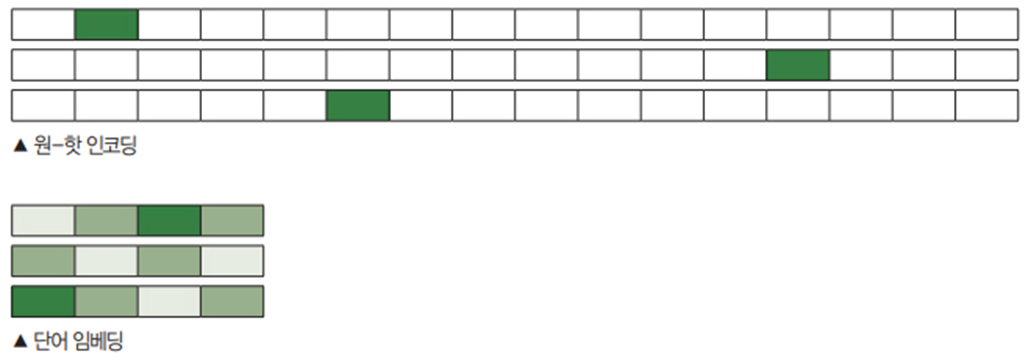<BR />
예를 들어 <BR />
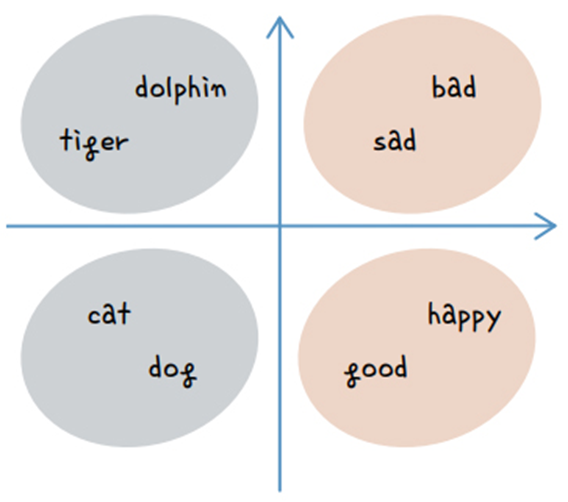<BR />
단어간의 유사도를 학습을 해서 서로 유사한 것끼리 그룹을 만들어 단어의 패턴을 찾아서 중요도를 알아내도록 하는 것을 단어 임배딩이라고 한다,

In [9]:
# 임베딩에 입력될 단어의 수를 지정합니다.
word_size = len(token.word_index) +1 # word_size는 20 ： 단어의 수

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size, 8、 input_length=4)) 

'''
model.add(Embedding(input_dim, output_im、 input_length=4)) 
input_dim=20
    사전에 등록된 단어 개수"를 의미.
    즉, 단어 인덱스는 0 ~ 19 까지 총 20개의 단어를 다룰 수 있다는 뜻.
output_im=8
    각 단어를 몇 차원의 벡터로 표현할지 정하는 값.
    즉, 단어 하나가 8차원 벡터로 매핑.
    예: "재밌다"라는 단어가 [0.12, -0.85, 0.33, ..., 0.07] 같은 8차원 숫자 벡터로 변환됨
input_length=4
    한 문장(입력 시퀀스)의 최대 길이를 의미.
'''
model.build((None, 4))
'''
model.build(input_shape) 
    input_shape=(None, 4)
    None → 배치 크기(batch size)는 아직 정해지지 음 (유동적)
    4는 한 문장의 길이(시퀀스 길이)는 4 단어로 고정
    즉, 이 모델은 "입력이 (batch_size, 4) 크기의 정수 시퀀스다" 라고 명시, 각 숫자는 토큰화된 "단어 인덱스"를 의미.
    Sequential 모델에 **처음 레이어(예: Embedding)**를 추가했을 때,내부적으로 몇 개의 파라미터(가중치)가 필요한지 미리 계산하려면 build()가 유용합니다.
'''
model.add(Flatten())  # 1차원으로 변경한다.
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 4, 8)           │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.6000 - loss: 0.6906
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7000 - loss: 0.6883
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8000 - loss: 0.6860
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8000 - loss: 0.6838
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8000 - loss: 0.6815
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8000 - loss: 0.6792
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9000 - loss: 0.6770
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9000 - loss: 0.6747
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.6724
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.6701
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.6679
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.6656


In [ ]:
# 학습코드

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import numpy as np

# ============================
# 1. 학습 데이터 준비
# ============================
docs = [
    "너무 재밌네요",
    "최고예요",
    "참 잘 만든 영화예요",
    "추천하고 싶은 영화입니다",
    "한번 더 보고싶네요",
    "글쎄요",
    "별로예요",
    "생각보다 지루하네요",
    "연기가 어색해요",
    "재미없어요"
]

# 1 = 긍정, 0 = 부정
classes = np.array([1,1,1,1,1,0,0,0,0,0])

# 토크나이저로 단어 사전 생성
token = Tokenizer()
token.fit_on_texts(docs)

# 문장을 시퀀스로 변환
x = token.texts_to_sequences(docs)

# 문장 길이를 맞추기 위해 padding (최대 4단어로 고정)
padded_x = pad_sequences(x, maxlen=4)

# 단어 집합 크기
word_size = len(token.word_index) + 1
print("단어 사전 크기:", word_size)
print("단어 인덱스:", token.word_index)
print("패딩된 입력 데이터:\n", padded_x)

# ============================
# 2. 모델 구성
# ============================
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))  # 단어 임베딩
model.add(Flatten())  # 임베딩 결과를 1차원으로 변환
model.add(Dense(1, activation='sigmoid'))  # 이진 분류

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ============================
# 3. 모델 학습
# ============================
model.fit(padded_x, classes, epochs=20, verbose=1)

In [ ]:
예측코드

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 예측할 문장
test_sentences = ["정말 재미있었어요"]

# 토크나이저로 시퀀스로 변환
test_seq = token.texts_to_sequences(test_sentences)

# 패딩 (훈련 때와 동일하게 maxlen=4 사용)
test_padded = pad_sequences(test_seq, maxlen=4)

# 예측
pred = model.predict(test_padded)
'''
print("문장:", test_sentence[0])
print("예측 확률(긍정):", pred[0][0])
print("결과:", "긍정" if pred[0][0] >= 0.5 else "부정")
'''
for i, sentence in enumerate(test_sentences):
    print(f"문장: {sentence}")
    print(f"예측 확률(긍정): {pred[i][0]:.4f}")
    print("결과:", "긍정 😊" if pred[i][0] >= 0.5 else "부정 😡")
    print("-"*40)